<a href="https://colab.research.google.com/github/the-y-p/DSA/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170508288/170498071 [==============================] - 13s 0us/step


(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["Airplane","automobile",'bird','cat','deer','dog','frog','horse','ship','truck']

In [101]:
def plot_sample(x, y, index):
  plt.figure(figsize=(4,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

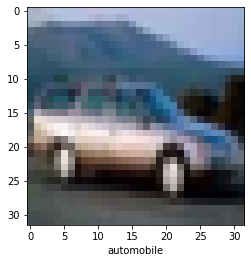

In [102]:
plot_sample(x_train, y_train , 4)

In [10]:
x_train = x_train /255.0
x_test = x_test /255.0

In [11]:
ann = models.Sequential([
      layers.Flatten(input_shape=(32,32,3)),
      layers.Dense(3000, activation='relu'),
      layers.Dense(1000, activation='relu'),
      layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
ann.fit(x_train, y_train , epochs=5)

Epoch 1/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.8152 - accuracy: 0.3533
Epoch 2/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.6237 - accuracy: 0.4247
Epoch 3/5
1563/1563 [==============================] - 122s 78ms/step - loss: 1.5425 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 124s 79ms/step - loss: 1.4816 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 123s 78ms/step - loss: 1.4336 - accuracy: 0.4961


In [46]:
cnn = models.Sequential([
      #cnn
      layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),
      #dense
      layers.Flatten(),
      layers.Dense(1000, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(10, activation='softmax')
])


In [47]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics =['accuracy'])

In [48]:
cnn.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5403 - accuracy: 0.4336
Epoch 2/15
1563/1563 [==============================] - 54s 34ms/step - loss: 1.1969 - accuracy: 0.5736
Epoch 3/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0490 - accuracy: 0.6281
Epoch 4/15
1563/1563 [==============================] - 51s 32ms/step - loss: 0.9439 - accuracy: 0.6647
Epoch 5/15
1563/1563 [==============================] - 51s 32ms/step - loss: 0.8585 - accuracy: 0.6972
Epoch 6/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7778 - accuracy: 0.7269
Epoch 7/15
1563/1563 [==============================] - 51s 32ms/step - loss: 0.7075 - accuracy: 0.7510
Epoch 8/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.6425 - accuracy: 0.7713
Epoch 9/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.5781 - accuracy: 0.7957
Epoch 10/15
1563/1563 [==============================] - 51s 32m

In [81]:
import pickle

In [82]:
with open('model_pickle','wb') as f:
  pickle.dump(cnn,f)

INFO:tensorflow:Assets written to: ram://948a7eb7-ab77-485e-834d-5d56750ddd9c/assets


In [88]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [89]:
mp.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 1.3128 - accuracy: 0.6807


[1.312786340713501, 0.6807000041007996]

In [49]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 1.3128 - accuracy: 0.6807


[1.312786340713501, 0.6807000041007996]

In [50]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

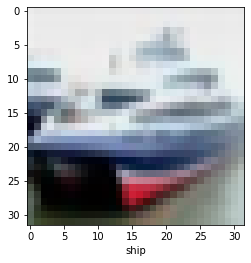

In [51]:
plot_sample(x_test,y_test,1)

In [90]:
y_pred = mp.predict(x_test)
y_pred[:5]

array([[3.9173447e-05, 1.3485549e-05, 1.0817451e-03, 2.6534283e-01,
        3.9236690e-04, 7.1876341e-01, 1.3606855e-02, 5.8344862e-04,
        1.7243749e-04, 4.3110217e-06],
       [2.0825905e-04, 2.8791857e-07, 3.2087517e-09, 4.0190394e-12,
        2.2753675e-09, 1.5654170e-13, 1.3150716e-13, 9.7103011e-13,
        9.9979085e-01, 6.2503580e-07],
       [3.8881205e-02, 1.5497452e-01, 1.2859240e-03, 4.9713015e-04,
        9.1574284e-06, 1.2750288e-04, 9.4143697e-06, 1.9304878e-05,
        7.0754933e-01, 9.6646562e-02],
       [9.9826896e-01, 4.5609824e-10, 7.5102973e-05, 2.6681957e-06,
        4.8675101e-06, 1.6830402e-09, 1.3112267e-11, 2.6465465e-09,
        1.6483169e-03, 6.9309053e-08],
       [7.2993984e-08, 6.7435082e-07, 1.4570714e-02, 6.4902000e-02,
        7.4782431e-01, 9.4953814e-04, 1.7175150e-01, 4.3895790e-07,
        1.7523143e-07, 5.7689908e-07]], dtype=float32)

In [53]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [54]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

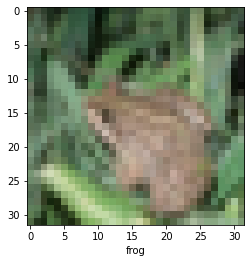

In [91]:
plot_sample(x_test,y_test,4)

In [92]:
classes[y_classes[4]]

'deer'

In [57]:
print("Classification Report : \n ", classification_report(y_test,y_classes))

Classification Report : 
                precision    recall  f1-score   support

           0       0.73      0.71      0.72      1000
           1       0.80      0.81      0.80      1000
           2       0.63      0.53      0.58      1000
           3       0.47      0.53      0.50      1000
           4       0.63      0.65      0.64      1000
           5       0.52      0.62      0.57      1000
           6       0.72      0.78      0.75      1000
           7       0.85      0.61      0.71      1000
           8       0.76      0.82      0.79      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



Predicted o/p : dog
Predicted o/p : ship
Predicted o/p : ship
Predicted o/p : Airplane
Predicted o/p : deer
Predicted o/p : frog
Predicted o/p : automobile
Predicted o/p : frog
Predicted o/p : cat
Predicted o/p : truck


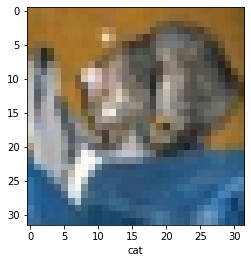

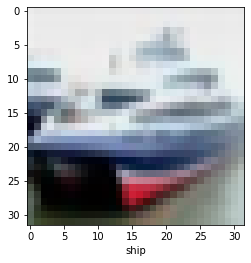

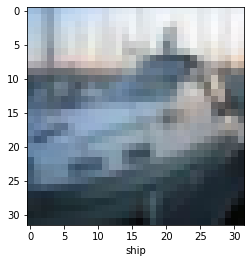

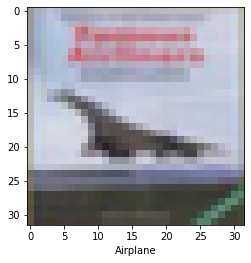

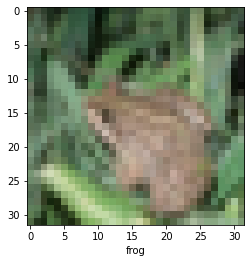

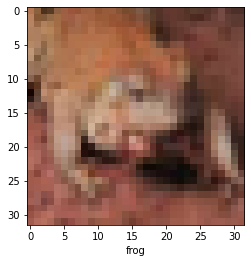

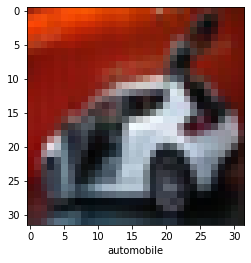

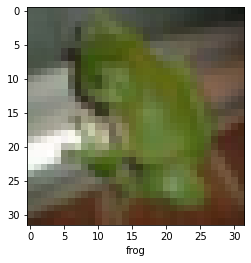

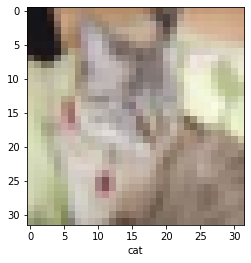

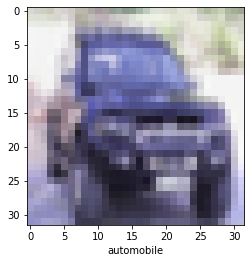

In [93]:
for i in range(10):
  plot_sample(x_test,y_test,i)
  print("Predicted o/p : "+str(classes[y_classes[i]]))

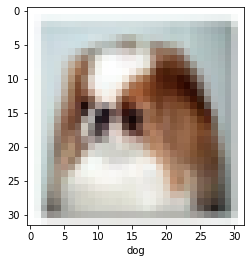

dog
total-time : 4.406388998031616


In [120]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np
import time
from sklearn.metrics import confusion_matrix, classification_report



def plot_sample(x, y, index):
  classes = ["Aeroplane", "automobile", 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  plt.figure(figsize=(4,4))
  plt.imshow(x[index])
  plt.xlabel(classes[int(y[index])])
  plt.show()

def is_model_saved():
  if os.path.isfile('saved_model'):
    with open('saved_model','rb') as f:
      mp = pickle.load(f)
    return mp
  else:
    

    cnn = models.Sequential([
      # cnn
      layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      # dense
      layers.Flatten(),
      layers.Dense(1000, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(10, activation='softmax')
    ])

    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    cnn.fit(x_train, y_train, epochs=15)

    with open('saved_model','wb') as f:
      pickle.dump(cnn,f)
    return cnn


def pred(x_test,y_test,index):
  start = time.time()
  model = is_model_saved()
  y_test = y_test.reshape(-1)
  y_pred = model.predict(x_test)
  y_classes = [np.argmax(element) for element in y_pred]
  plot_sample(x_test,y_test,index)
  print(classes[y_classes[index]])
  end = time.time()
  print("total-time :",end-start)

if __name__ == '__main__':
  (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

  y_train = y_train.reshape(-1)
  x_train = x_train / 255.0
  x_test = x_test / 255.0

  classes = ["Aeroplane", "automobile", 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

  pred(x_test,y_test,181)

